# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
file_path = 'world_bank_development_indicators.csv'
data = pd.read_csv(file_path)

In [3]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Using mean imputation for simplicity
data_imputed = data.copy()
numerical_cols = data.select_dtypes(include=['float64']).columns
data_imputed[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [4]:
# Standardize the numerical data
scaler = StandardScaler()
data_scaled = data_imputed.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data_imputed[numerical_cols])

# Statistical Analysis

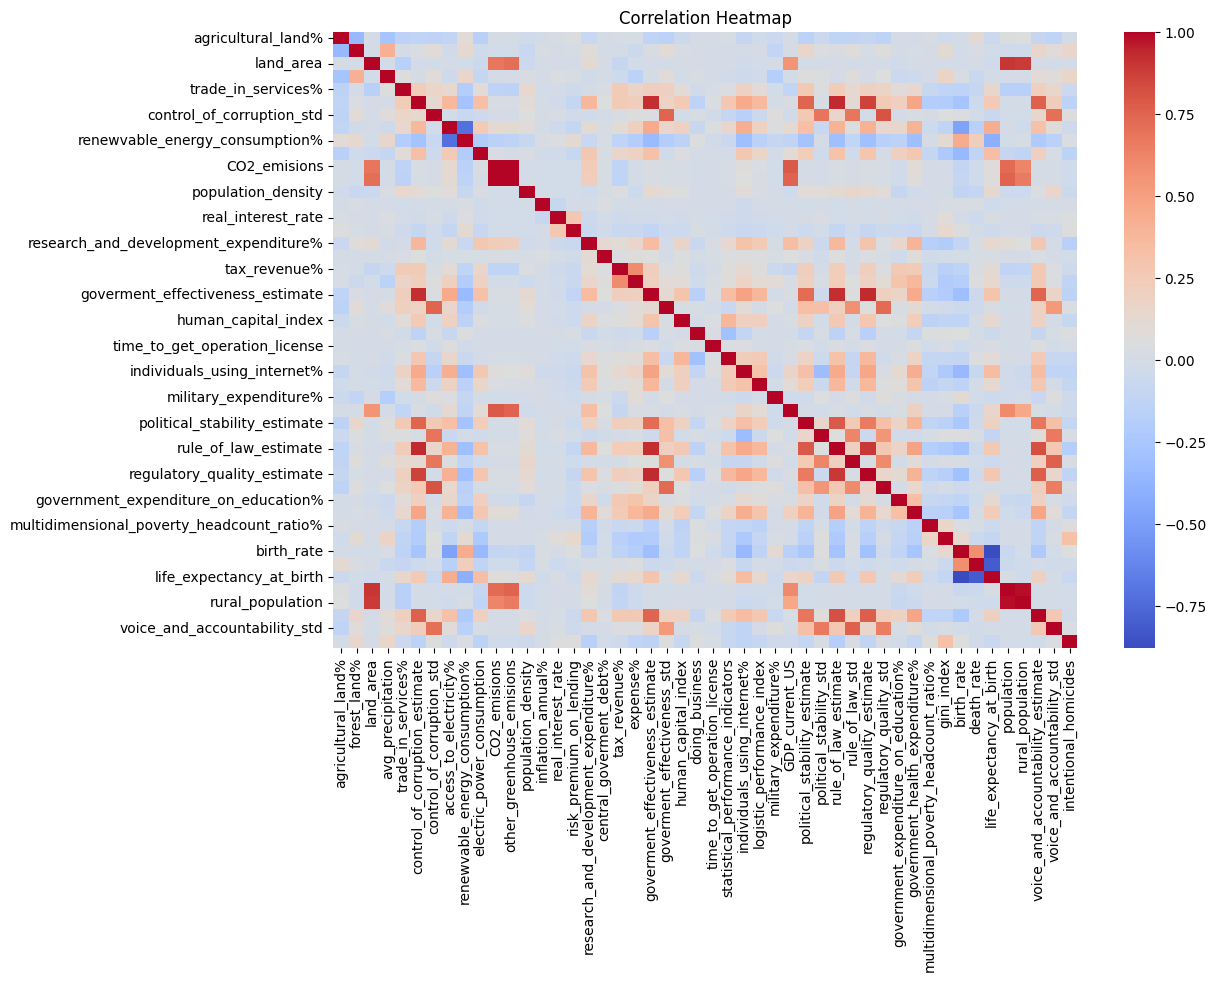

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_scaled[numerical_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

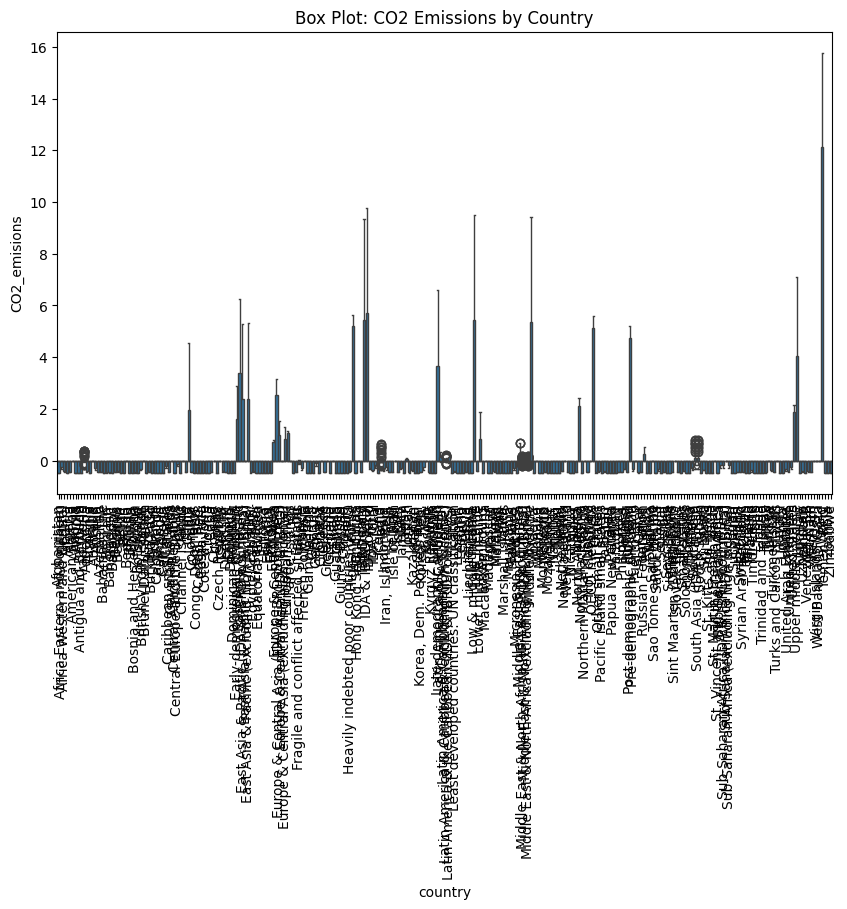

In [6]:
# Box plot and Violin plot for specific columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_scaled, x='country', y='CO2_emisions')
plt.title("Box Plot: CO2 Emissions by Country")
plt.xticks(rotation=90)
plt.show()

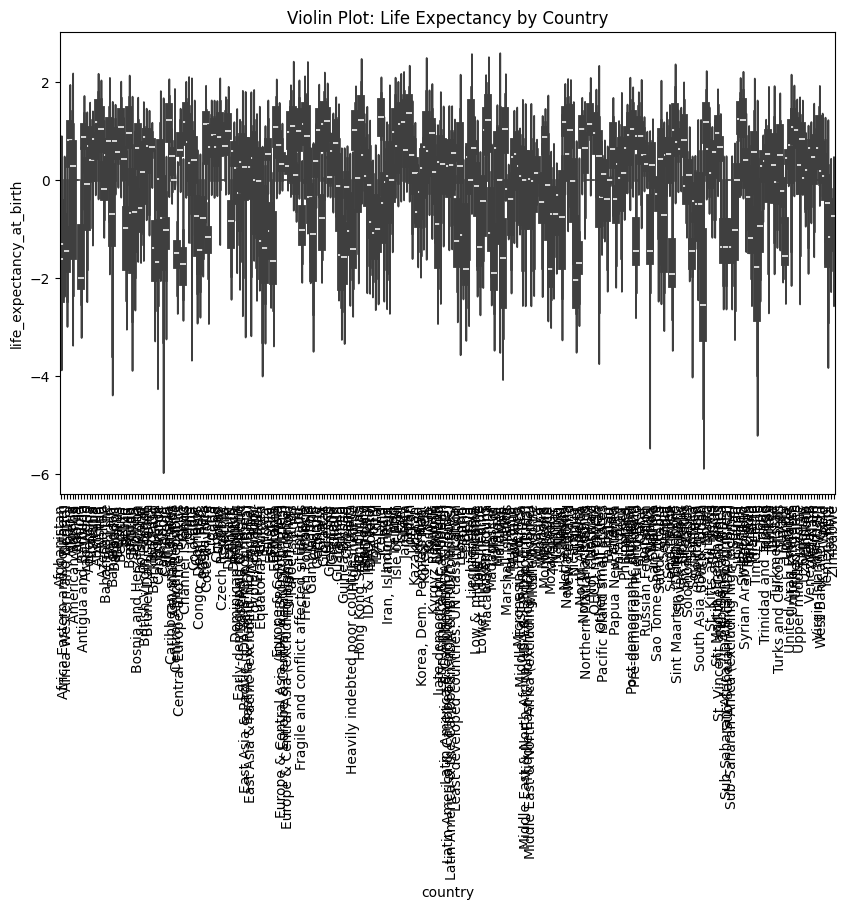

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_scaled, x='country', y='life_expectancy_at_birth')
plt.title("Violin Plot: Life Expectancy by Country")
plt.xticks(rotation=90)
plt.show()

# Clustering

In [8]:
# Select features for clustering
clustering_features = ['renewvable_energy_consumption%', 'CO2_emisions', 'population_density']
data_clustering = data_scaled[clustering_features].dropna()

In [9]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_clustering)

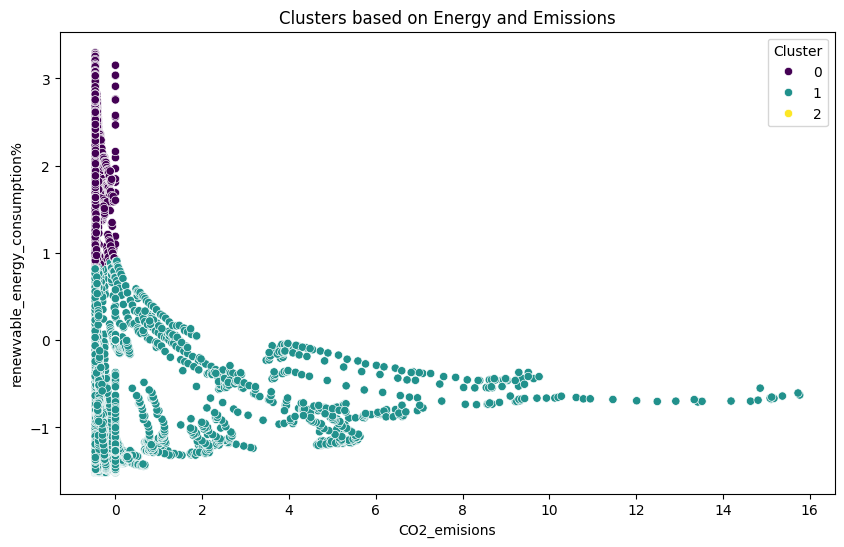

In [10]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_clustering, x='CO2_emisions', y='renewvable_energy_consumption%', hue='Cluster', palette='viridis')
plt.title("Clusters based on Energy and Emissions")
plt.show()

# Classification

Sustainability Category Distribution:
Sustainability_Category
0    14096
1     3176
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2827
           1       0.95      0.94      0.95       628

    accuracy                           0.98      3455
   macro avg       0.97      0.97      0.97      3455
weighted avg       0.98      0.98      0.98      3455



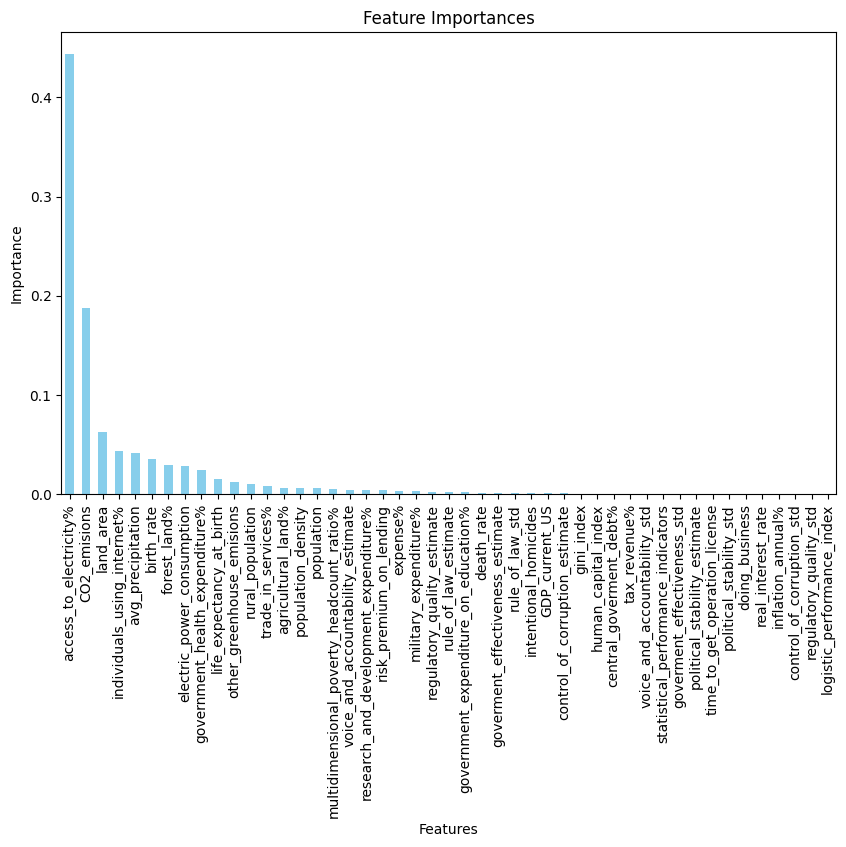

In [11]:
# Dynamically create bins for Sustainability Category
bins = pd.qcut(
    data_scaled['renewvable_energy_consumption%'], 
    q=3, 
    retbins=True, 
    duplicates='drop'
)[1]  # Retrieve bin edges

data_scaled['Sustainability_Category'] = pd.qcut(
    data_scaled['renewvable_energy_consumption%'], 
    q=len(bins) - 1, 
    labels=list(range(len(bins) - 1))
)

# Verify Sustainability Category distribution
print("Sustainability Category Distribution:")
print(data_scaled['Sustainability_Category'].value_counts())

# Prepare data for classification
X = data_scaled[numerical_cols].drop(columns=['renewvable_energy_consumption%'], errors='ignore')
y = data_scaled['Sustainability_Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Plot feature importance
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Forecasting

Forecasted CO2 Emissions: 7408    1.266698e+06
7409    1.281829e+06
7410    1.282011e+06
7411    1.282013e+06
7412    1.282013e+06
7413    1.282013e+06
7414    1.282013e+06
7415    1.282013e+06
7416    1.282013e+06
7417    1.282013e+06
Name: predicted_mean, dtype: float64


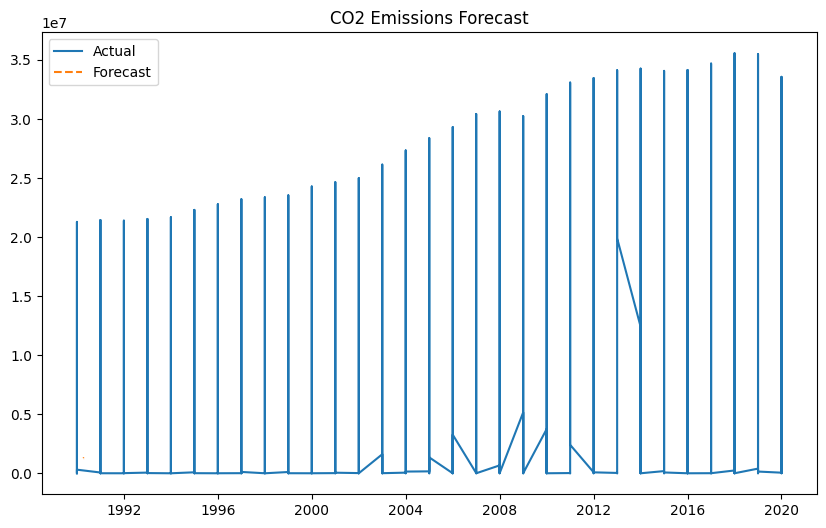

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Extract time-series data for forecasting
time_series = data[['date', 'CO2_emisions']].dropna()
time_series['date'] = pd.to_datetime(time_series['date'])
time_series = time_series.sort_values('date').set_index('date')

# Apply ARIMA model
model = ARIMA(time_series['CO2_emisions'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)
print("Forecasted CO2 Emissions:", forecast)

# Plot actual vs forecasted
plt.figure(figsize=(10, 6))
plt.plot(time_series['CO2_emisions'], label="Actual")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.legend()
plt.title("CO2 Emissions Forecast")
plt.show()


# PCA for Dimensionality Reduction

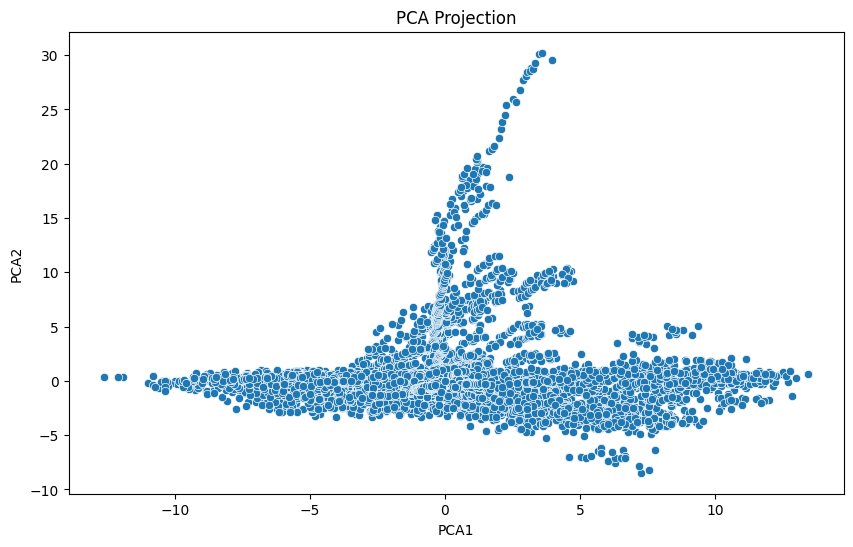

In [13]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled[numerical_cols])

# Add PCA results back to the data
data_scaled['PCA1'] = principal_components[:, 0]
data_scaled['PCA2'] = principal_components[:, 1]

# Scatter plot of PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_scaled, x='PCA1', y='PCA2')
plt.title("PCA Projection")
plt.show()


# Advanced Statistical Analysis

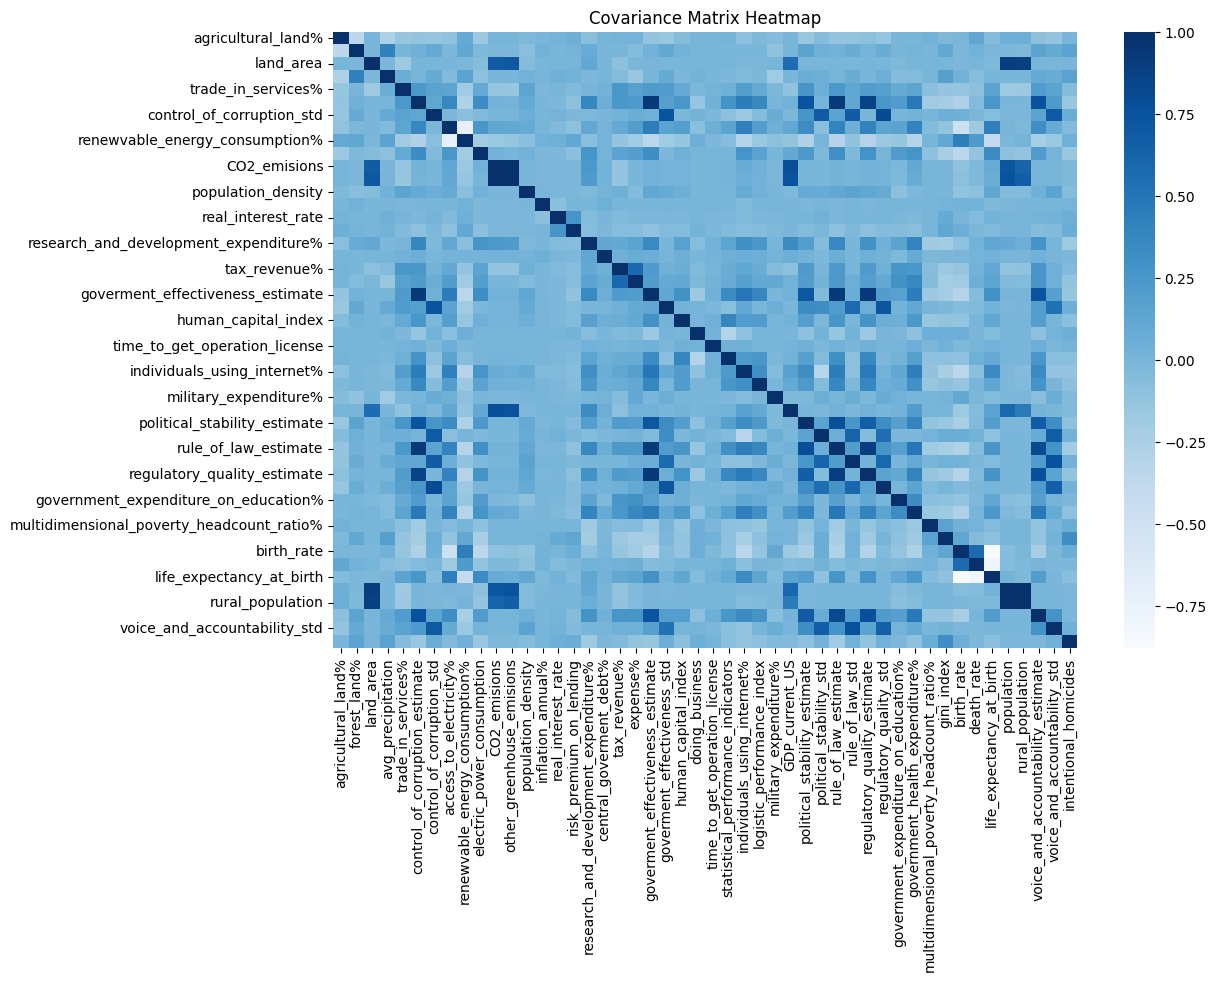

In [14]:
# Covariance matrix
cov_matrix = data_scaled[numerical_cols].cov()
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=False, cmap='Blues')
plt.title("Covariance Matrix Heatmap")
plt.show()

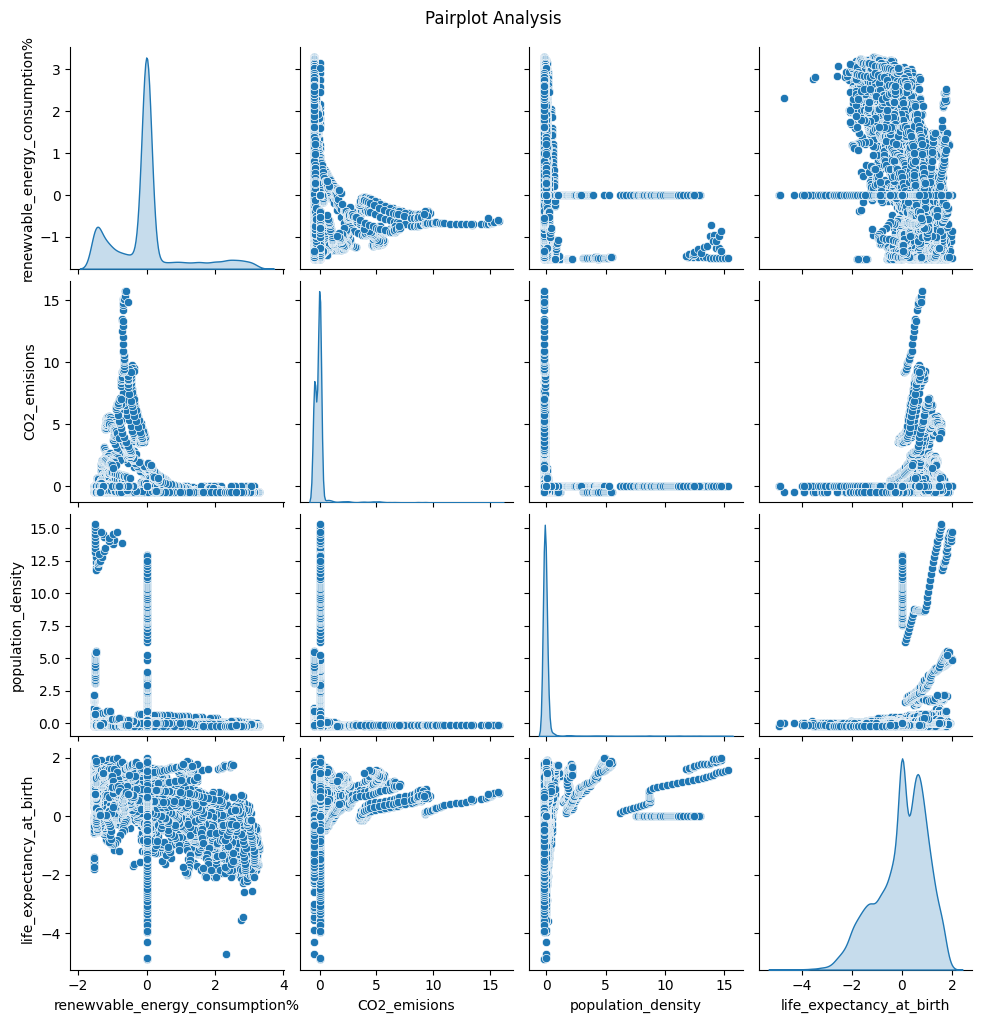

In [15]:
# Pairplot of select columns
selected_columns = ['renewvable_energy_consumption%', 'CO2_emisions', 'population_density', 'life_expectancy_at_birth']
sns.pairplot(data_scaled[selected_columns].dropna(), diag_kind='kde')
plt.suptitle("Pairplot Analysis", y=1.02)
plt.show()

# Feature Engineering

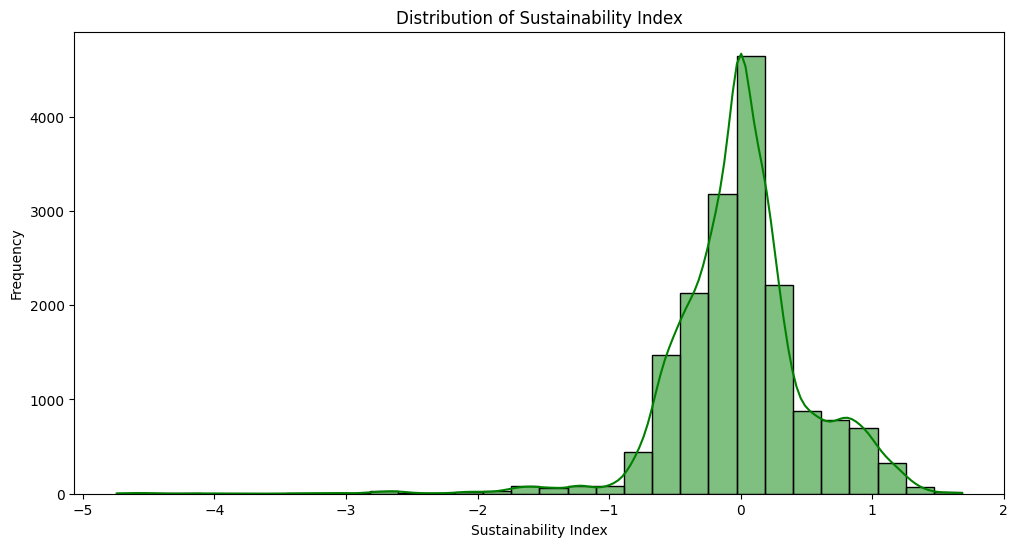

In [16]:
# Create a Sustainability Index
data_scaled['Sustainability_Index'] = (
    0.4 * data_scaled['renewvable_energy_consumption%'] -
    0.3 * data_scaled['CO2_emisions'] +
    0.3 * data_scaled['life_expectancy_at_birth']
)

# Visualize Sustainability Index
plt.figure(figsize=(12, 6))
sns.histplot(data_scaled['Sustainability_Index'], bins=30, kde=True, color='green')
plt.title("Distribution of Sustainability Index")
plt.xlabel("Sustainability Index")
plt.ylabel("Frequency")
plt.show()

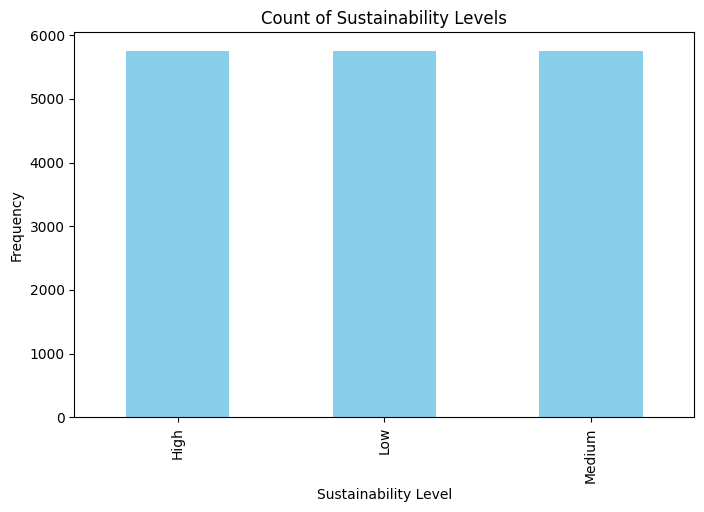

In [17]:
# Categorize Sustainability Index
data_scaled['Sustainability_Level'] = pd.qcut(
    data_scaled['Sustainability_Index'], q=3, labels=['Low', 'Medium', 'High']
)

# Bar plot of sustainability levels
plt.figure(figsize=(8, 5))
data_scaled['Sustainability_Level'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Count of Sustainability Levels")
plt.ylabel("Frequency")
plt.xlabel("Sustainability Level")
plt.show()

# Temporal Analysis

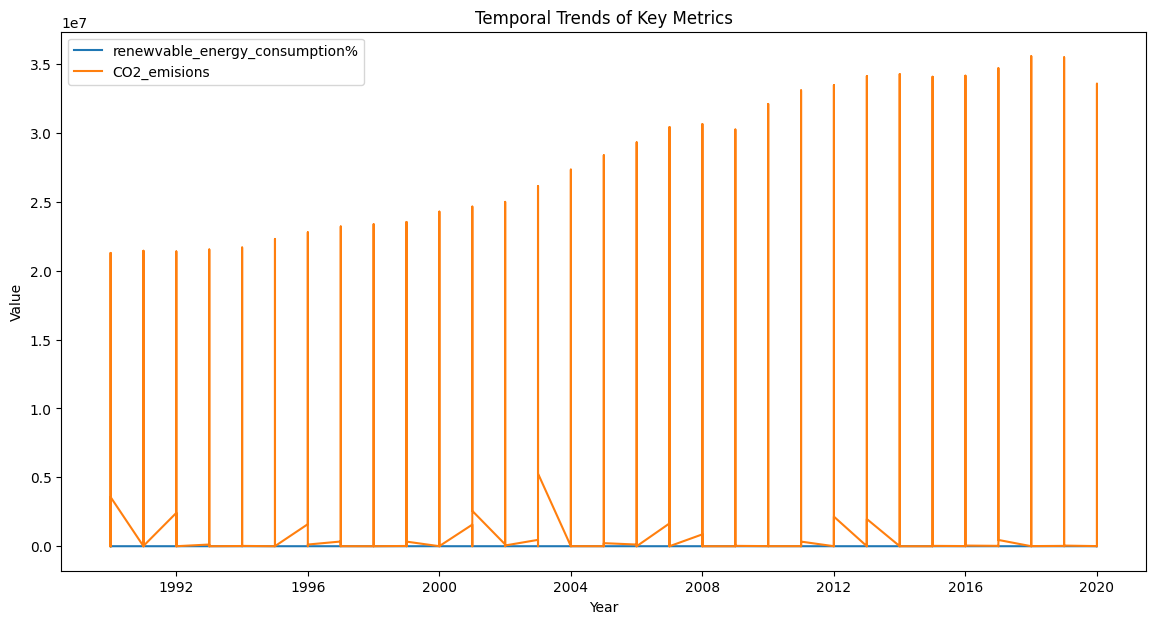

In [18]:
# Temporal trends for key metrics
time_series_data = data[['date', 'renewvable_energy_consumption%', 'CO2_emisions']].dropna()
time_series_data['date'] = pd.to_datetime(time_series_data['date'])
time_series_data = time_series_data.sort_values('date')

# Plot trends
plt.figure(figsize=(14, 7))
for col in ['renewvable_energy_consumption%', 'CO2_emisions']:
    plt.plot(time_series_data['date'], time_series_data[col], label=col)
plt.title("Temporal Trends of Key Metrics")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()

# Advanced Clustering

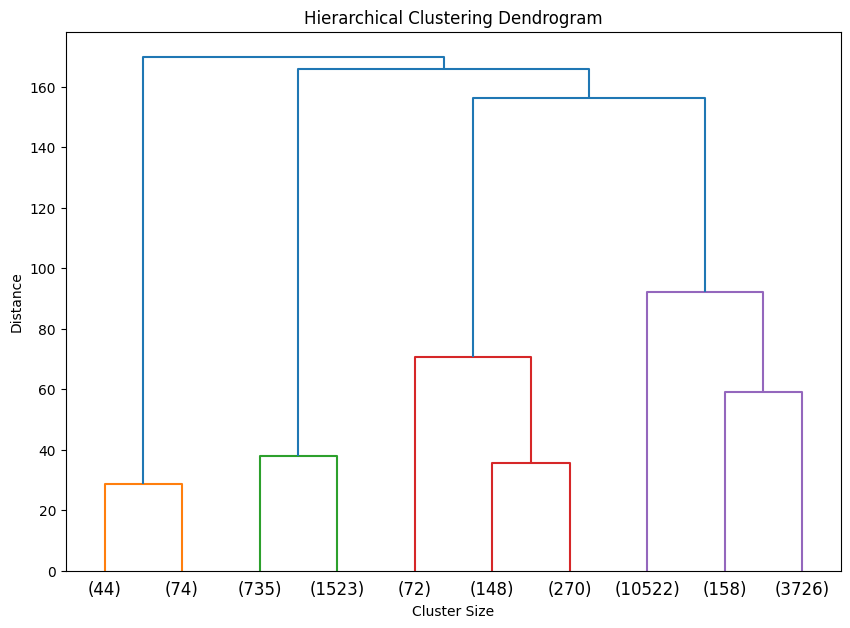

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(data_clustering, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

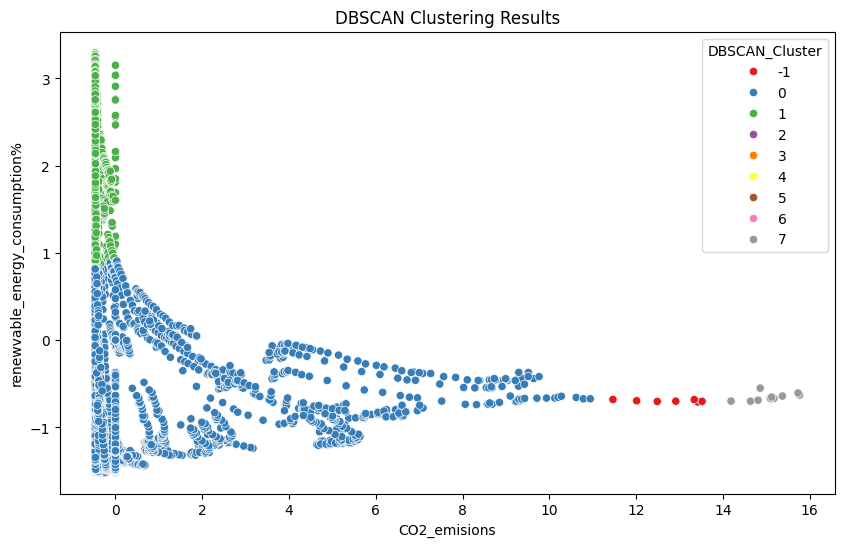

In [20]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_clustering['DBSCAN_Cluster'] = dbscan.fit_predict(data_clustering)

# Visualize DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_clustering, x='CO2_emisions', y='renewvable_energy_consumption%', hue='DBSCAN_Cluster', palette='Set1')
plt.title("DBSCAN Clustering Results")
plt.show()